In [131]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('sales_full_data.csv') # Reading the csv file
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [133]:
df.isnull().sum()   #taking note of the Nan values in the csv file

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [134]:
df1 = df.dropna()   # droping off the Nan values
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [135]:
df1.shape   #keeping an eye on the shape

(186305, 6)

In [136]:
def timer(df):
    if df.split(' ')[-1].split(':')[0] != '1' :
        
        if df.split(' ')[-1].split(':')[0] != 'Date':
            return str(int(df.split(' ')[-1].split(':')[0]) ) + '-' + str(int(df.split(' ')[-1].split(':')[0]) +1)
    else:
        return '1 - 2'

df1['Time'] = df1['Order Date'].apply(timer)    # Using the Dates to get the time 
df2 = df1.dropna()
df2.head()

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",8-9
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",22-23
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",14-15
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",14-15
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",9-10


In [137]:
df2['Quantity Ordered'] = df2['Quantity Ordered'].apply(lambda x: int(x))   #Type cast the data of Quantity Ordered and Price Each to intiger
df2['Price Each'] = df2['Price Each'].apply(lambda x: float(x))


D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
df2['Total Price'] = df2['Quantity Ordered']*df2['Price Each']      #Getting the total sale of a product at a perticular time

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
dct = {}
for key,dataf in df2.groupby('Time'):
    dct[key] = dataf['Total Price'].sum()
print(dct)
print(max(dct))             
print(min(dct))     

{'0-1': 713721.27, '1 - 2': 190690.75, '1-2': 270176.13, '10-11': 1944286.7699999998, '11-12': 2300610.2399999998, '12-13': 2316821.34, '13-14': 2155389.8, '14-15': 2083672.73, '15-16': 1941549.5999999999, '16-17': 1904601.31, '17-18': 2129361.6099999994, '18-19': 2219348.3, '19-20': 2412938.54, '2-3': 234851.44, '20-21': 2281716.2399999998, '21-22': 2042000.8599999996, '22-23': 1607549.21, '23-24': 1179304.44, '3-4': 145757.89, '4-5': 162661.01, '5-6': 230679.81999999998, '6-7': 448113.0, '7-8': 744854.1199999999, '8-9': 1192348.97, '9-10': 1639030.5799999998}
9-10
0-1


Text(0.5, 1.0, 'Sales per hour')

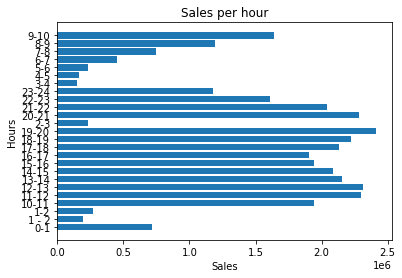

In [140]:

plt.barh(list(dct.keys()),list(dct.values()))
plt.xlabel('Sales')
plt.ylabel('Hours')
plt.title('Sales per hour')